In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style

import empiricaldist
import scipy.stats

In [83]:
matplotlib.style.use('seaborn-v0_8-whitegrid')

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Load palmerpenguins dataset

Source:
https://github.com/allisonhorst/palmerpenguins

In [4]:
penguins_original = pd.read_csv(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    )

# Remove null values

In [5]:
nan_indexes = penguins_original.index[penguins_original.isna().any(axis=1)]
penguins = penguins_original.dropna(axis = 0, how = 'any').copy()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Descriptive Statistics

In [6]:
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
ranges = penguins.max(numeric_only = True) - penguins.min(numeric_only = True)
ranges

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## Interquartile Range
Includes 50% of the data

In [8]:
iqr = (
    penguins.quantile(0.75, numeric_only = True) 
    - penguins.quantile(0.25, numeric_only = True) )
iqr

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [9]:
(
    penguins
    .quantile([0.25, 0.5, 0.75], numeric_only = True)
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.5,44.5,48.6,9.1
1,bill_depth_mm,15.6,17.3,18.7,3.1
2,flipper_length_mm,190.0,197.0,213.0,23.0
3,body_mass_g,3550.0,4050.0,4775.0,1225.0
4,year,2007.0,2008.0,2009.0,2.0


# Graphics

## histplot

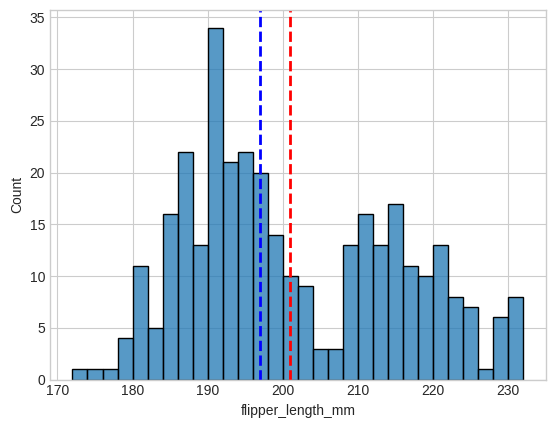

In [10]:
sns.histplot(
    data = penguins,
    x = 'flipper_length_mm',
    binwidth = 2,
    # hue = 'species',
    
)

plt.axvline(
    x = penguins['flipper_length_mm'].mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = penguins['flipper_length_mm'].median(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.show()

## boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

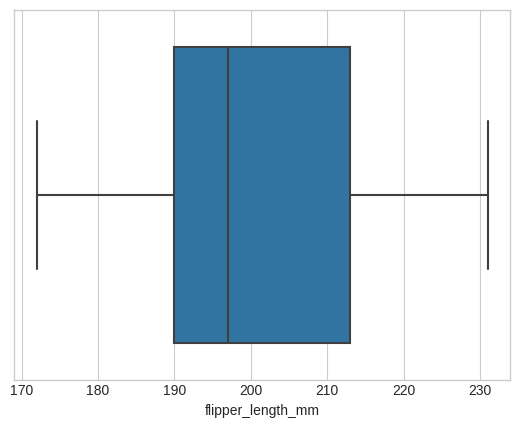

In [11]:
sns.boxplot(
    data = penguins,
    x = 'flipper_length_mm',
)

# Distributions

# PMF

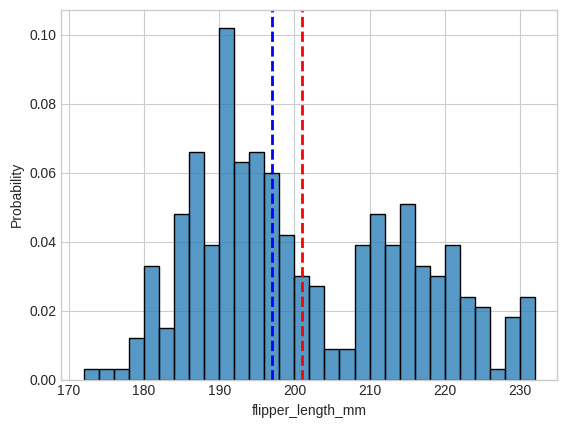

In [12]:
sns.histplot(
    data = penguins,
    x = 'flipper_length_mm',
    binwidth = 2,
    stat = 'probability',
    # hue = 'species',
    
)

plt.axvline(
    x = penguins['flipper_length_mm'].mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = penguins['flipper_length_mm'].median(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.show()

In [13]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    penguins.flipper_length_mm,
    normalize = True
)

pmf_flipper_length_mm.head()

,probs
172.0,0.003003
174.0,0.003003
176.0,0.003003


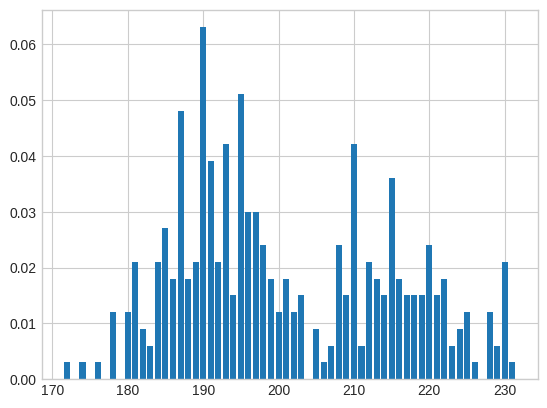

In [14]:
pmf_flipper_length_mm.bar()

In [15]:
pmf_flipper_length_mm(190)

0.06306306306306306

# eCDF (empirical Cumulative Distribution Function)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

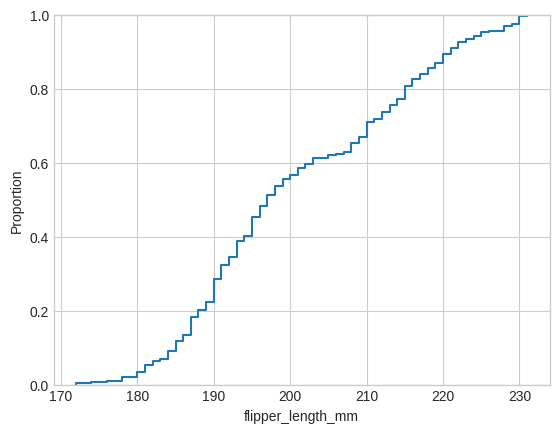

In [16]:
sns.ecdfplot(
    data = penguins,
    x = 'flipper_length_mm',
    # hue = 'species',
)

In [17]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    penguins.flipper_length_mm
)

cdf_flipper_length_mm.head()

,probs
172.0,0.003003
174.0,0.006006
176.0,0.009009


In [18]:
q = 200
p = cdf_flipper_length_mm[q]
print (q, p)

200 0.5675675675675675


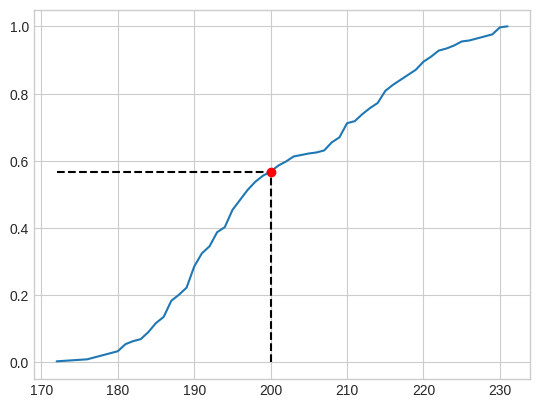

In [19]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm[q]

plt.vlines(
    x = q,
    ymin = 0,
    ymax = p,
    color = 'black',
    linestyle = 'dashed',
)

plt.hlines(
    y = p,
    xmin = pmf_flipper_length_mm.qs[0],
    xmax = q,
    color = 'black',
    linestyle = 'dashed',
)

plt.plot(q, p, 'ro')
plt.show()

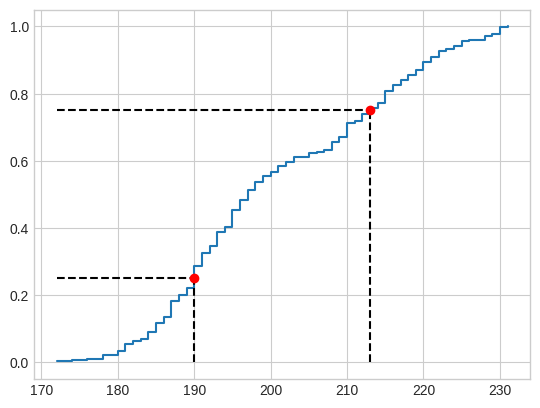

In [20]:
cdf_flipper_length_mm.step()
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

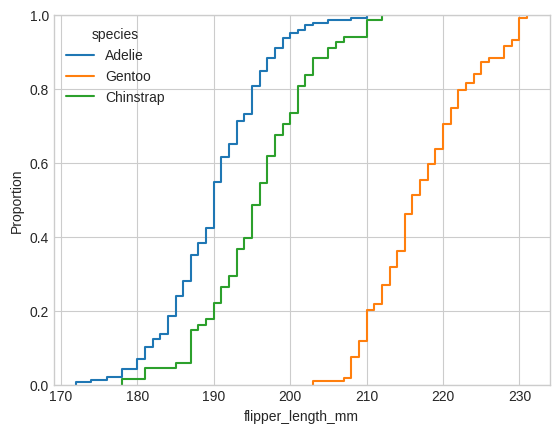

In [21]:
sns.ecdfplot(
    data = penguins,
    x = 'flipper_length_mm',
    hue = 'species',
)

# PDF

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

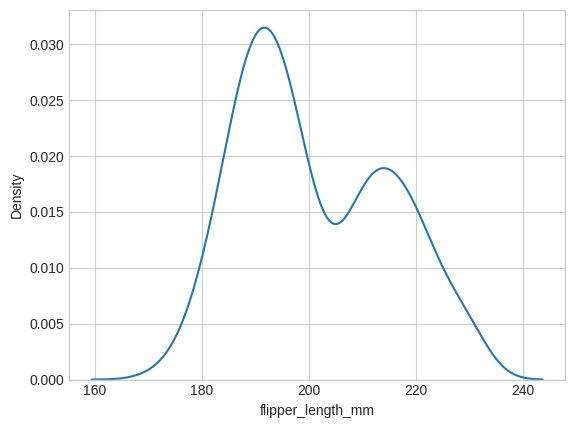

In [88]:
sns.kdeplot(
    data = penguins,
    x = 'flipper_length_mm',
    bw_method = 0.3
)

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

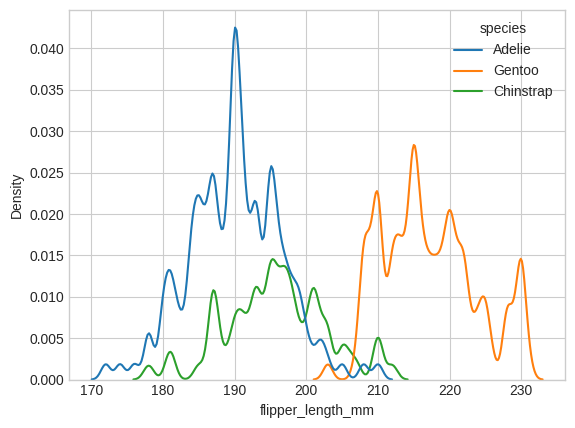

In [23]:
sns.kdeplot(
    data = penguins,
    x = 'flipper_length_mm',
    bw_method = 0.1,
    hue = 'species',
)

## Comparison of body mass with normal distribution

In [24]:
body_mass_stats = penguins.body_mass_g.describe()
body_mass_stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot: >

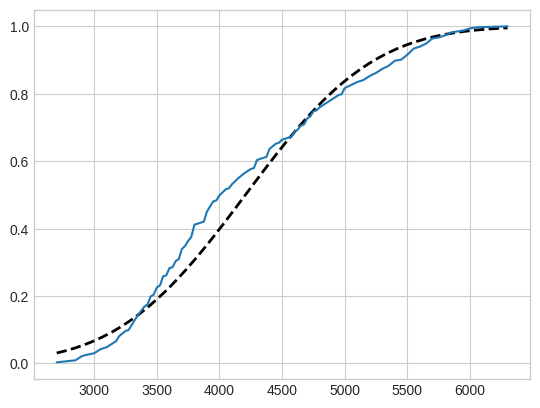

In [25]:
xs = np.linspace( body_mass_stats['min'], body_mass_stats['max'], 50)
ys = scipy.stats.norm(body_mass_stats['mean'], body_mass_stats['std']).cdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed', linewidth = 2)

empiricaldist.Cdf.from_seq(penguins.body_mass_g).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

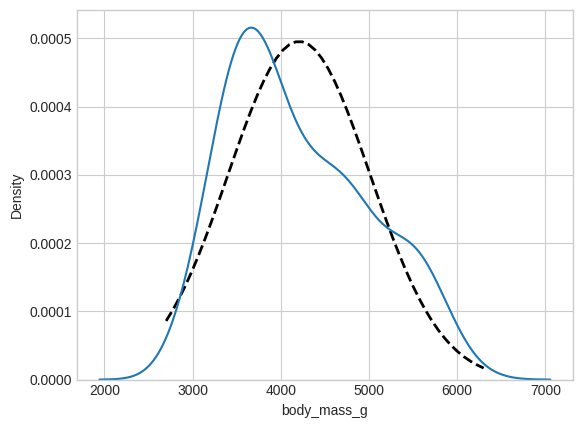

In [26]:
xs = np.linspace( body_mass_stats['min'], body_mass_stats['max'], 50)
ys = scipy.stats.norm(body_mass_stats['mean'], body_mass_stats['std']).pdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed', linewidth = 2)

sns.kdeplot(
    data = penguins,
    x = 'body_mass_g',
)

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

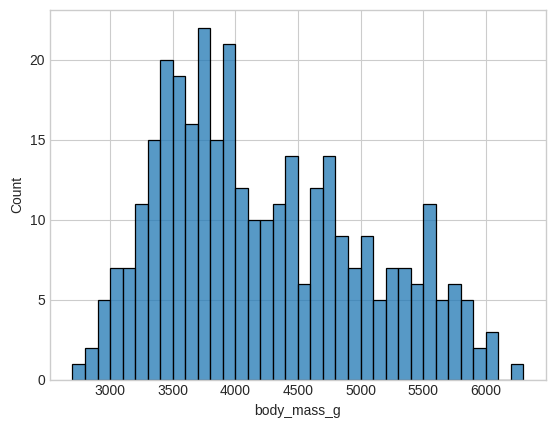

In [27]:
sns.histplot(
    data = penguins,
    x = 'body_mass_g',
    binwidth = 100,
)

# Comparison numerical variables with normal distribution

In [30]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

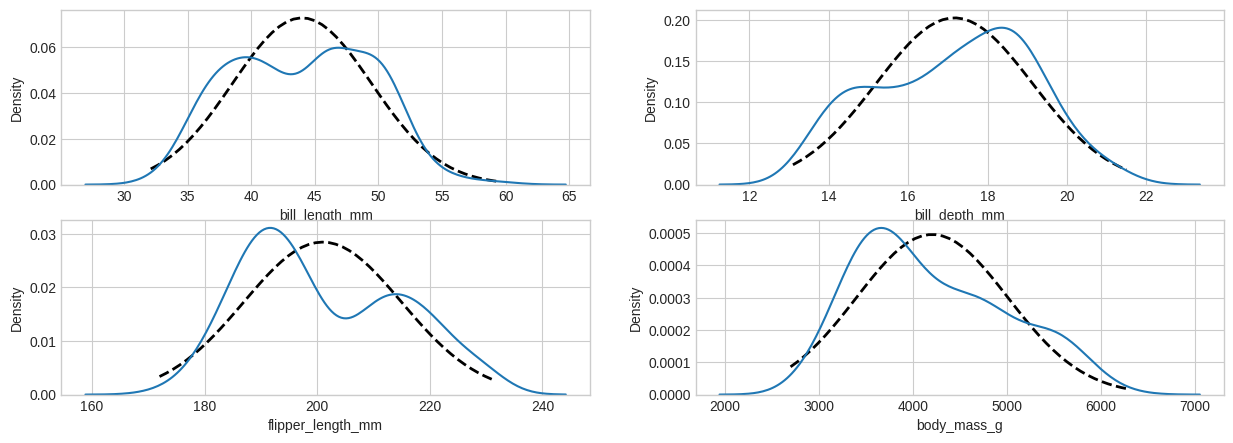

In [42]:
float_cols = penguins.select_dtypes(include=['float64']).columns

fig, ax = plt.subplots(2, 2, figsize=(15, 5))
for i, col in enumerate(float_cols):

    category_stats = penguins[col].describe()
    xs = np.linspace( category_stats['min'], category_stats['max'], 50)
    ys = scipy.stats.norm(category_stats['mean'], category_stats['std']).pdf(xs)

    ax[i//2, i%2].plot(xs, ys, color = 'black', 
             linestyle = 'dashed', 
             linewidth = 2,
             )

    sns.kdeplot(
        data = penguins,
        x = col,
        ax = ax[i//2, i%2]
    )

plt.show()

# Comparison of numerical variables with normal distribution by species

In [48]:
penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

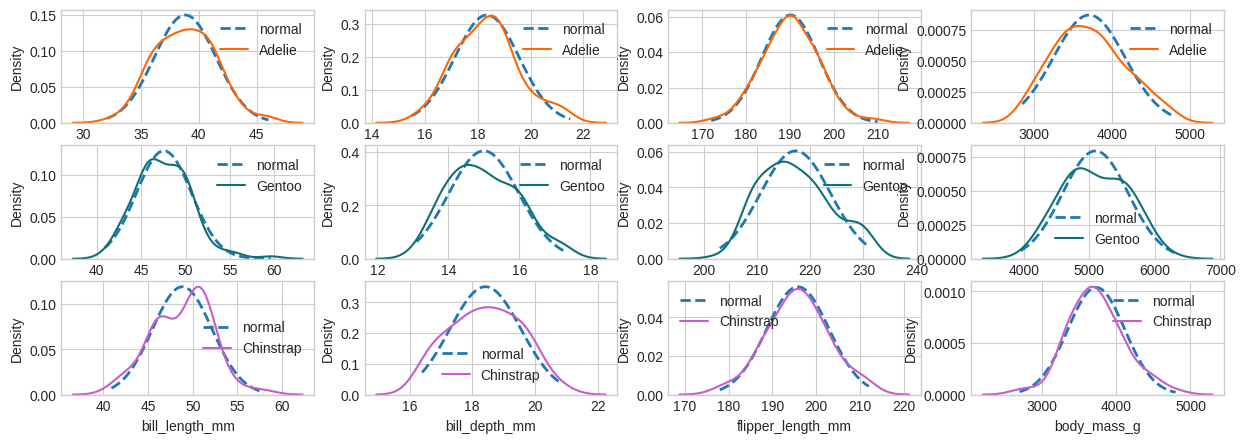

In [85]:
float_cols = penguins.select_dtypes(include=['float64']).columns
species_arr = penguins.species.unique()

fig, ax = plt.subplots(3, 4, figsize=(15, 5))


for s, sp in enumerate(species_arr):
    for i, col in enumerate(float_cols):
        category_stats = penguins[penguins.species == sp][col].describe()
        xs = np.linspace( category_stats['min'], category_stats['max'], 50)
        ys = scipy.stats.norm(category_stats['mean'], category_stats['std']).pdf(xs)

        ax[ s , i ].plot(xs, ys, 
                 linestyle = 'dashed', 
                 linewidth = 2,
                 label = 'normal'
                 )
        
        sns.kdeplot(
            data = penguins[penguins.species == sp],
            x = col,
            ax = ax[ s , i ],
            label = sp,
            color = penguin_color[sp]
        )
        
        ax[ s , i ].legend()

plt.show()